Sentiment Analysis of Twitter using NL Toolkit in Python


In [137]:
#Importing Libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [59]:
#Reading Dataset
data= pd.read_csv("training.1600000.processed.noemoticon.csv",encoding='latin1')
data.head()





,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [60]:
data.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [61]:
#renaming the colums
#DATASET_COLUMNS=['target','ids','date','flag','user','text']
data.columns = ['target', 'id','query', 'date','user','text']
data.head(20)


,target,id,query,date,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [62]:
#EDA
#Checking the shape
data.shape

(1599999, 6)

Total Rows is 1599999 and
Total Columns is 6

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   query   1599999 non-null  object
 3   date    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [65]:
data.columns

Index(['target', 'id', 'query', 'date', 'user', 'text'], dtype='object')

In [66]:
#checking missing values
print(data.isnull().sum())

target    0
id        0
query     0
date      0
user      0
text      0
dtype: int64


no missing values found

In [68]:
#checking datatypes of each columns
print(data.dtypes)

target     int64
id         int64
query     object
date      object
user      object
text      object
dtype: object


In [69]:
#checking duplicate values and dealing with them
print(data.duplicated().sum())

0


no duplicated values

In [71]:
#check the unique target values
print(data['target'].nunique())

2


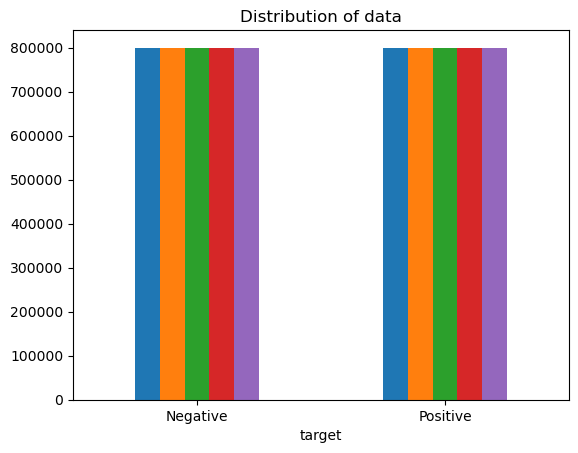

In [72]:
#Data Visvalization
# Plotting the distribution for dataset.
ax = data.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(data['text']), list(data['target'])

<Axes: xlabel='target', ylabel='count'>

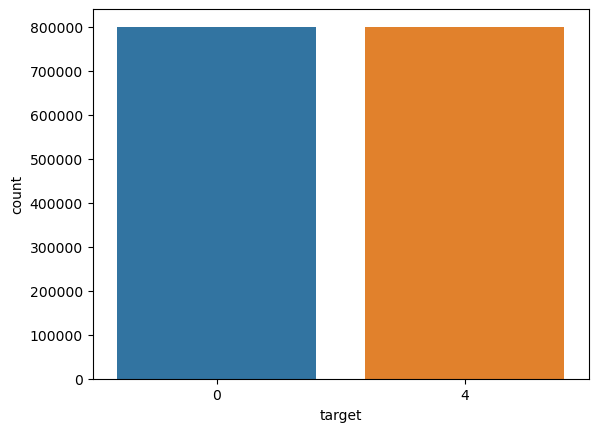

In [73]:
import seaborn as sns
sns.countplot(x='target', data=data)

In [74]:
data.head(20)

,target,id,query,date,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [ ]:

#The text is already lowercase no need to convert to lowercase, also url is already removed,also stowords are already removed,puntuations are also removed

In [76]:
#TEXT PREPROCESSING
#The provided dataset is already cleaned so no need to apply text processing techniques like tokenization, stmemming , lemmatization
#DATASET LINK https://drive.google.com/file/d/1X0yxLLT98MtYKIS_Leol6rTTkA4T13Zs/view 


In [77]:
#seprarting input features and labels
X=data.text
y=data.target

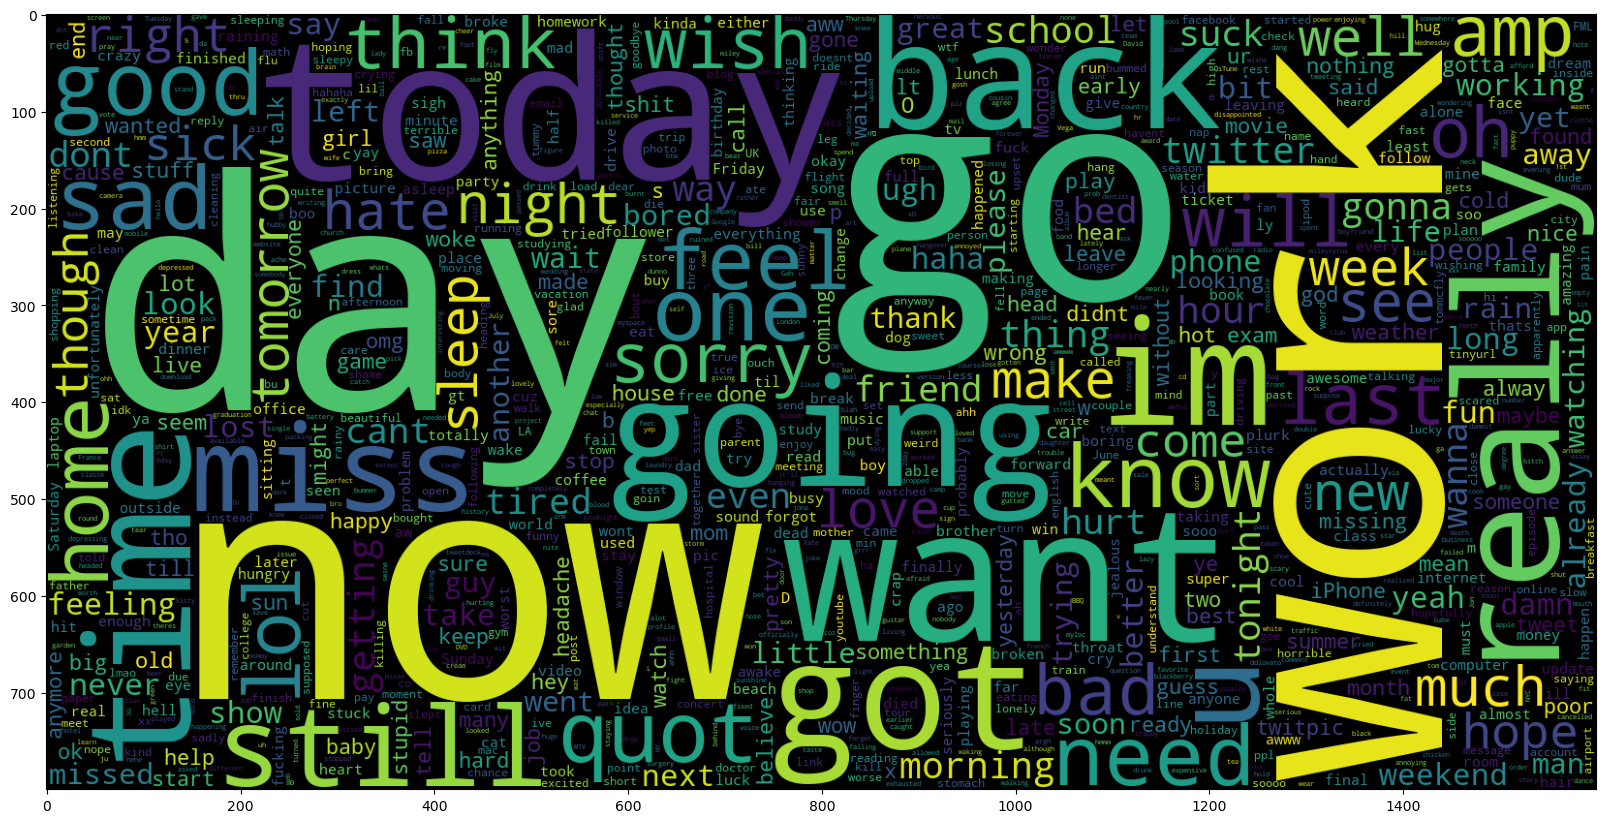

In [78]:
#Plot a cloud of words for negative tweets
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

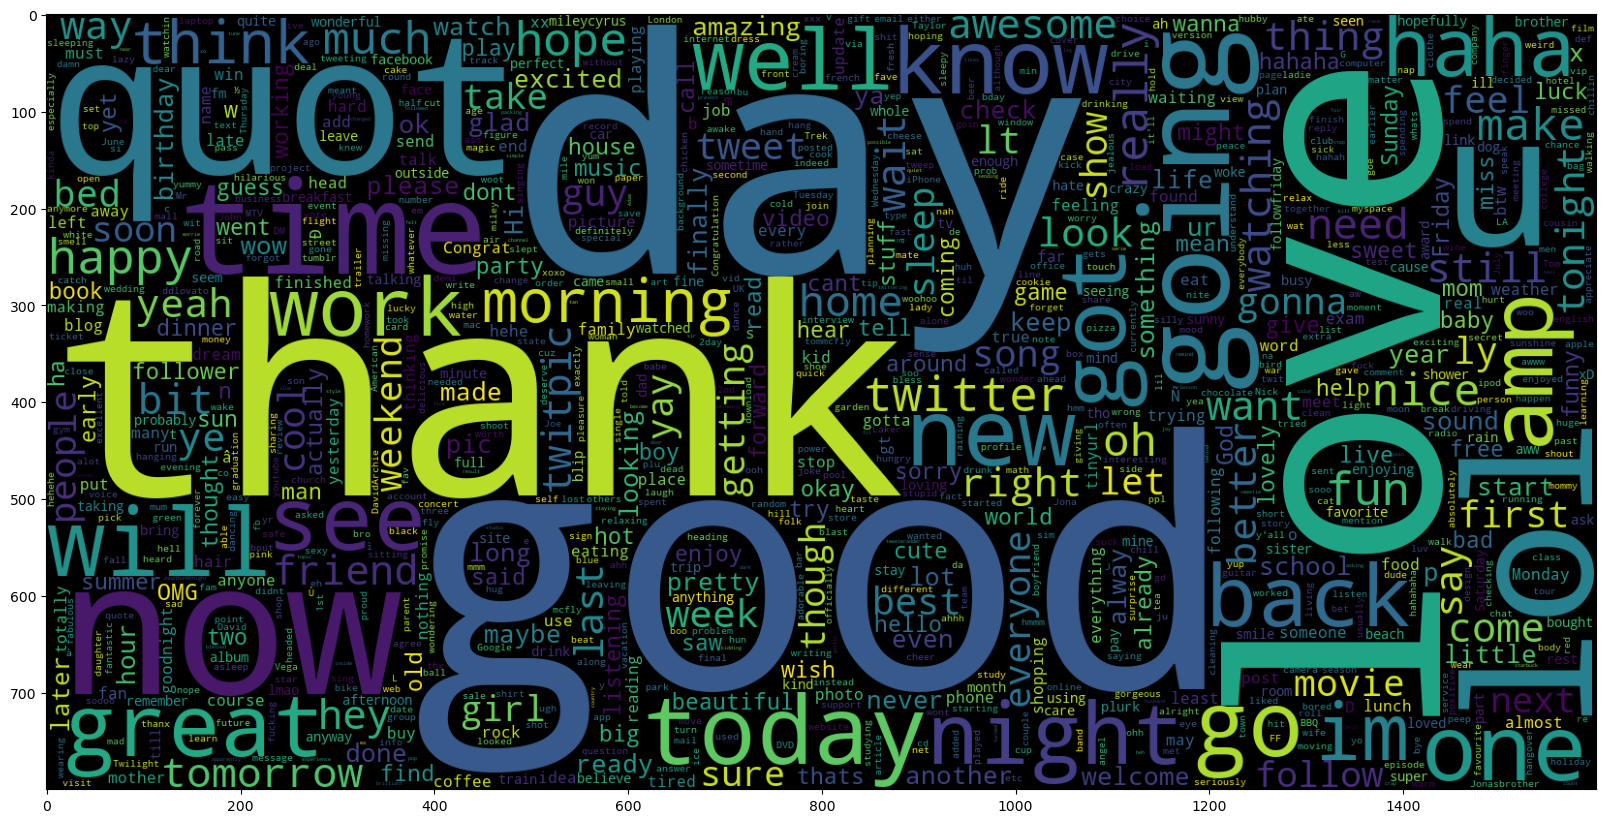

In [79]:
#Plot a cloud of words for positive tweets
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [80]:
#Splitting Our Data Into Train and test set
# Separating the 90% data for training data and 10% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =42)


In [81]:
#Transforming the Dataset Using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [82]:
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

 #Function for Model Evaluation
After training the model, we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively:

Accuracy Score
Confusion Matrix with Plot
ROC-AUC Curve

In [84]:
def model_Evaluate(model, X_test, y_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    
    # Print the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion Matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    
    # Calculate percentages
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    
    # Create labels with correct line breaks
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)
    
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     79812
           4       0.80      0.81      0.80     80188

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



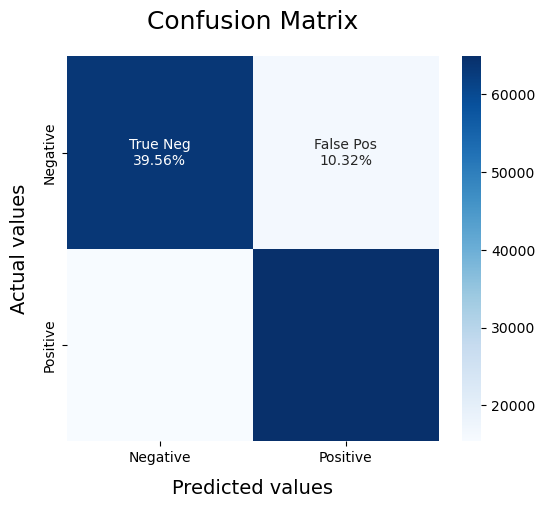

In [85]:
#Model Building
#In the problem statement, we have used three different models respectively :

#Bernoulli Naive Bayes Classifier
#SVM (Support Vector Machine)
#Logistic Regression
#Model 1 ( Naive Bayes Classifier Benoulli)
from sklearn.naive_bayes import BernoulliNB

# Initialize model
BNBmodel = BernoulliNB()

# Ensure binary features if using TF-IDF
X_train_binary = (X_train > 0).astype(int)
X_test_binary = (X_test > 0).astype(int)

# Train the model
BNBmodel.fit(X_train_binary, y_train)

# Evaluate the model
model_Evaluate(BNBmodel, X_test_binary, y_test)

# Predict values
y_pred1 = BNBmodel.predict(X_test_binary)


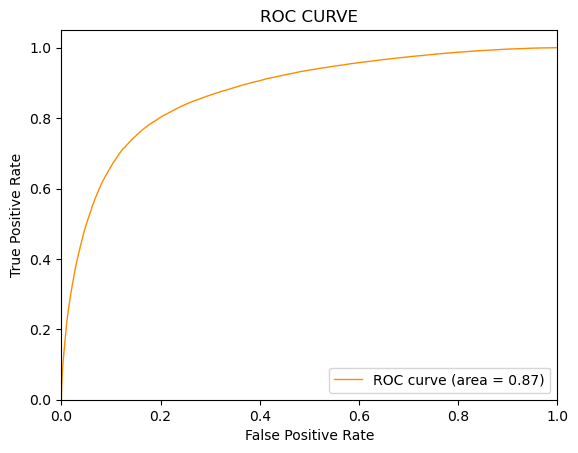

In [115]:
#Plot the ROC-AUC Curve for model-1 NB Classifer
# Convert 4 to 1 for binary classification
y_test_binary = np.where(y_test == 4, 1, y_test)

# Now plot the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()



C:\Users\BusinessAnalystVicky\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.70      0.71      0.71     79812
           4       0.71      0.70      0.70     80188

    accuracy                           0.70    160000
   macro avg       0.70      0.70      0.70    160000
weighted avg       0.70      0.70      0.70    160000



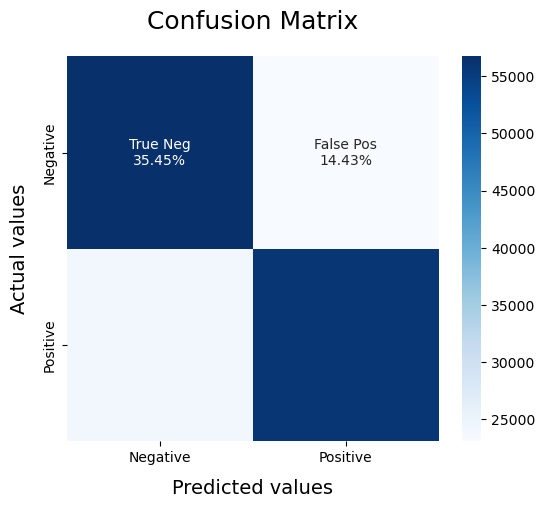

In [119]:
#Model 2
#SVM CLASSIFIER
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Initialize model
SVCmodel = LinearSVC()

# Feature scaling (standardize features, but don't center for sparse matrix)
scaler = StandardScaler(with_mean=False)

# Apply scaling to the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
SVCmodel.fit(X_train_scaled, y_train)

# Evaluate the model
model_Evaluate(SVCmodel, X_test_scaled, y_test)

# Predict values
y_pred2 = SVCmodel.predict(X_test_scaled)




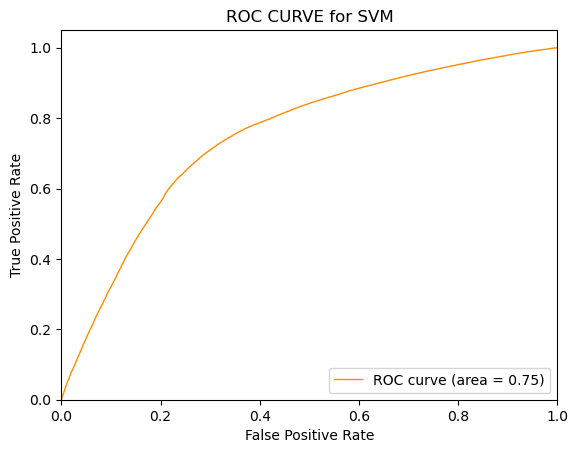

In [123]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Transform y_test to binary {0, 1} if necessary (e.g., {0, 4} -> {0, 1})
y_test_binary = (y_test == 4).astype(int)

# Get the decision function scores (instead of predict labels)
y_scores = SVCmodel.decision_function(X_test_scaled)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for SVM')
plt.legend(loc="lower right")
plt.show()



C:\Users\BusinessAnalystVicky\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.71      0.72      0.71     79812
           4       0.72      0.71      0.71     80188

    accuracy                           0.71    160000
   macro avg       0.71      0.71      0.71    160000
weighted avg       0.71      0.71      0.71    160000



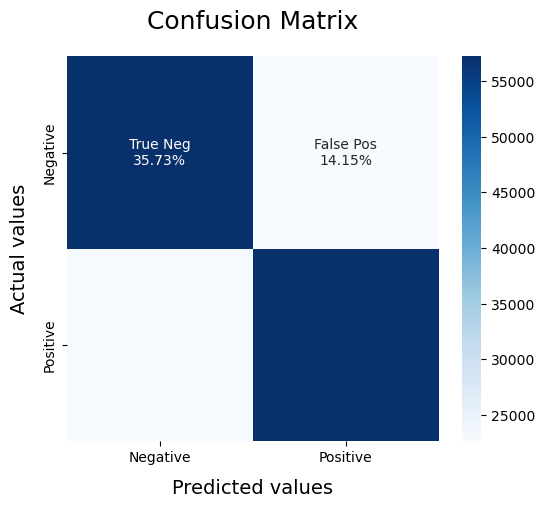

In [131]:
#Model 3 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.sparse import issparse

# Initialize model
LRmodel = LogisticRegression(C=2, max_iter=1000)

# Feature scaling (standardize features for better performance) without centering for sparse matrices
scaler = StandardScaler(with_mean=False)  # Don't center sparse matrices

# Apply scaling to the training and test data (keep them sparse)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using sparse data
LRmodel.fit(X_train_scaled, y_train)

# Evaluate the model
model_Evaluate(LRmodel, X_test_scaled, y_test)

# Predict values
y_pred3 = LRmodel.predict(X_test_scaled)



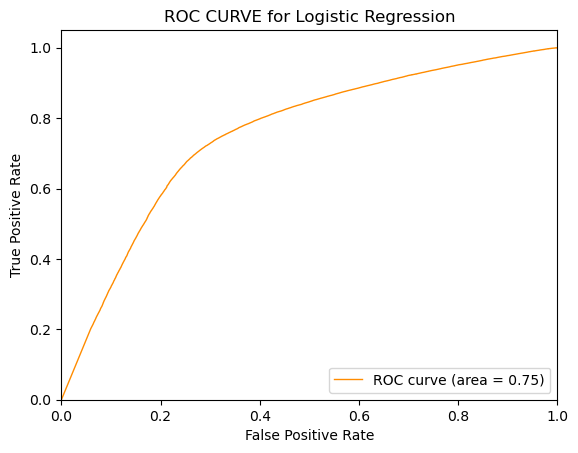

In [135]:
#Plot the ROC-AUC Curve for model-3 Logistic Regression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Specify the positive class label
pos_class = 4  # Or 0, depending on which class is the positive one in your case

# Get the predicted probabilities for the positive class (class 4 or 0)
y_pred_prob3 = LRmodel.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve (specify pos_label to handle labels {0, 4})
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob3, pos_label=pos_class)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for Logistic Regression')
plt.legend(loc="lower right")
plt.show()



Best alpha value:  {'alpha': 1}
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     79812
           4       0.80      0.81      0.80     80188

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



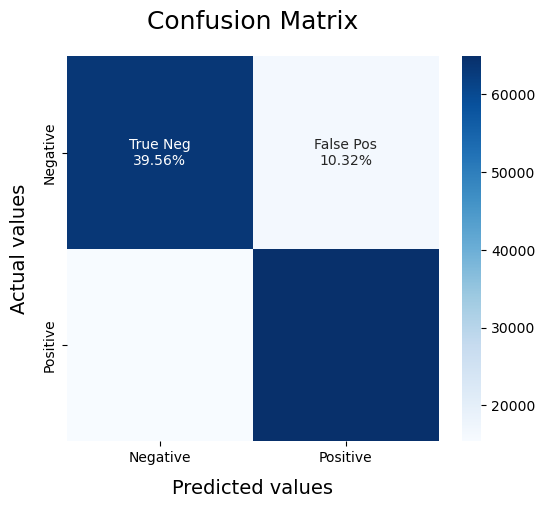

In [139]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.1, 0.5, 1, 1.5, 2.0]  # Tune alpha value for smoothing
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(BNBmodel, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_binary, y_train)

# Print best parameters found
print("Best alpha value: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
model_Evaluate(best_model, X_test_binary, y_test)

# Predict values
y_pred_best = best_model.predict(X_test_binary)


Upon evaluating all the models, we can conclude the following details i.e.


Accuracy: As far as the accuracy of the model is concernedBernoulli Naive Bayeson performs better than S and Logistic RegressioC score.

We, therefore, concludeBernoulli Naive BayesRegression is the best model for the above-given nlysis on Twitter.